In [5]:
import pandas as pd
from io import StringIO

csv_data =\
'''
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
df.dropna(axis = 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
# 모든 열이 Null인 행 삭제
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
# null이 아닌 값이 4보다 작은 행 삭제
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# 특정열에 nan이 있는 행만 삭제
df.dropna(subset = ['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [12]:
# 평균 대체 클래스
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values = np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [13]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [14]:
import pandas as pd
df= pd.DataFrame([
    ['green','M','10.1','class2'],
    ['red','L','13.5','class1'],
    ['blue','XL','15.3','class2']
])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [15]:
# 순서가 있는 범주형 특성 ( 산술 차이로 변환 )
size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' : 1
}
df['size'] = df['size'].map(size_mapping)

In [16]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [17]:
inv_size_mapping = {v :k for k ,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [18]:
import numpy as np
class_mapping = {label : idx for idx ,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [19]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [20]:
inv_class_mapping = {v : k for k,v in class_mapping.items()}
df['classlabel']= df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [21]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [23]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [24]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, '10.1'],
       [2, 2, '13.5'],
       [0, 3, '15.3']], dtype=object)

In [26]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color','size','price']].values
color_one = OneHotEncoder()
color_one.fit_transform(X[:,0].reshape(-1,1)).toarray()


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
X = df[['color','size','price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(dtype =int),[0]),
    ('nothing', 'passthrough',[1,2])
])
c_transf.fit_transform(X)

array([[0, 1, 0, 1, '10.1'],
       [0, 0, 1, 2, '13.5'],
       [1, 0, 0, 3, '15.3']], dtype=object)

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')

# Create the ColumnTransformer
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1,2])
])

transformed_X = c_transf.fit_transform(X)

transformed_X


array([[1.0, 0.0, 1, '10.1'],
       [0.0, 1.0, 2, '13.5'],
       [0.0, 0.0, 3, '15.3']], dtype=object)

In [47]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [48]:
print('클래스 레이블', np.unique(df_wine['Class label']))

클래스 레이블 [1 2 3]


In [49]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
from sklearn.model_selection import train_test_split

X, y =df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state= 0, stratify = y)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
X_train_norm = mns.fit_transform(X_train)
X_test_norm = mns.fit_transform(X_test)

In [52]:
ex= np.array([0,1,2,3,4,5])
print('표준화 = ', (ex - ex.mean()) / ex.std())
print('정규화 = ', (ex- ex.min())/ (ex.max() - ex.min()))

표준화 =  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화 =  [0.  0.2 0.4 0.6 0.8 1. ]


In [53]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
lr  =LogisticRegression(solver = 'liblinear', penalty=  'l1', C = 1.0, random_state=1)


In [55]:
lr.fit(X_train_std,y_train)
print('훈련 정확도 : ' , lr.score(X_train_std,y_train))

print('테스트 정확도 : ', lr.score(X_test_std,y_test))

훈련 정확도 :  1.0
테스트 정확도 :  1.0


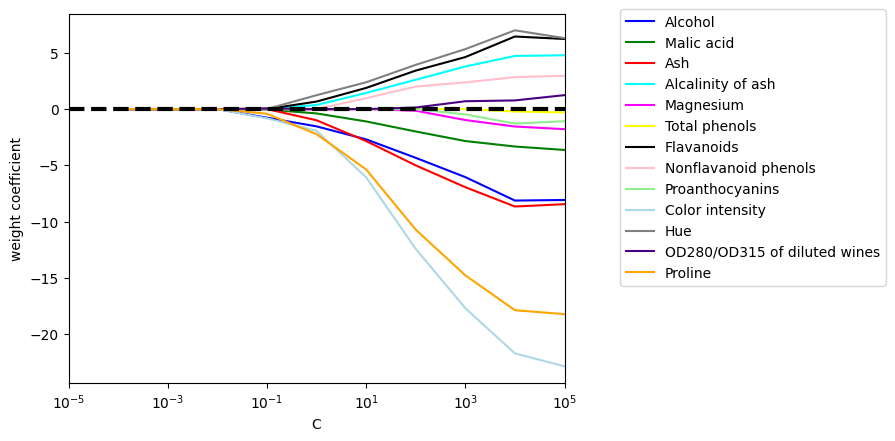

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

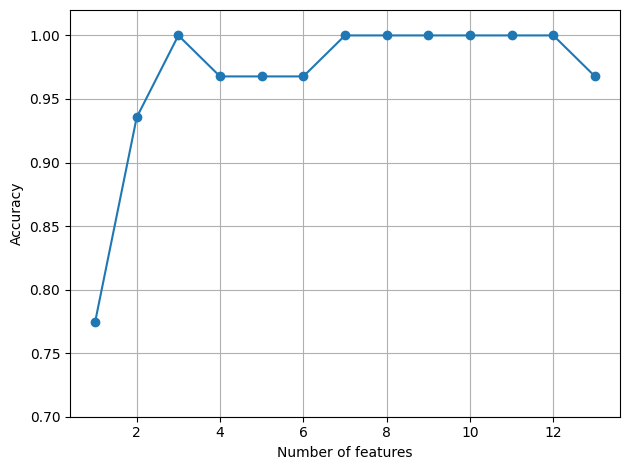

In [68]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


In [69]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [70]:
knn.fit(X_train_std,y_train)
print(knn.score(X_train_std,y_train))

print(knn.score(X_test_std,y_test))

0.967741935483871
0.9629629629629629


In [72]:
knn.fit(X_train_std[:, k3],y_train)

print(knn.score(X_train_std[:, k3],y_train))
print(knn.score(X_test_std[:, k3],y_test))

0.9516129032258065
0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


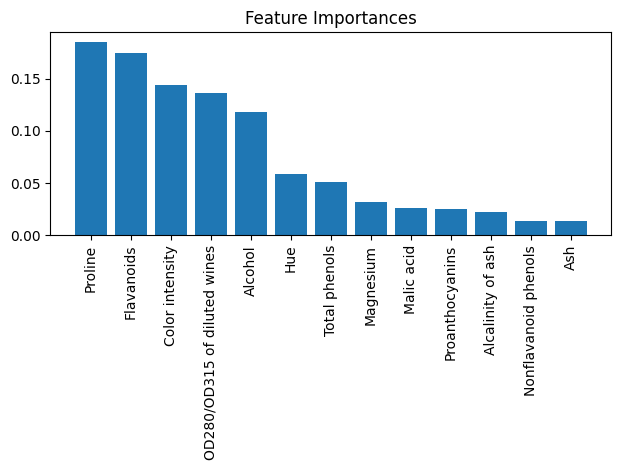

In [73]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
         align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [75]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold= 0.1 , prefit = True)
X_selected = sfm.transform(X_train)
print("임계 조건을 만족하는 샘플의 수 :", X_selected.shape[1])


임계 조건을 만족하는 샘플의 수 : 5


In [76]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
